In [1]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



2025-03-16 20:29:12.226286: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 20:29:12.227846: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 20:29:12.260106: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 20:29:12.260919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-16 20:29:12.956540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

[]

In [2]:
d_p = 40
d_V = 80
epochs = 300


In [3]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(80,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])



In [4]:
folder_path = "data/test_data/example_data/heat2d/"

In [5]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-16 20:29:14,713 - sciml.model.deeponet.deeponet - INFO - Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [6]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 6012.26it/s]


In [7]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [8]:
loss_history_train,loss_history_test = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 7513.98it/s]


2025-03-16 20:29:15.226022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [40,8000]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-03-16 20:29:15.258357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,8000]
	 [[{{node Placeholder/_2}}]]
2025-03-16 20:29:15.647543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeh

In [9]:
print(loss_history_train)

[0.30882325768470764, 0.29007488489151, 0.2792689800262451, 0.27800390124320984, 0.27523261308670044, 0.26799827814102173, 0.260322630405426, 0.2544909417629242, 0.24987861514091492, 0.24539566040039062, 0.24109068512916565, 0.23686739802360535, 0.23272818326950073, 0.22813370823860168, 0.22260989248752594, 0.21647436916828156, 0.2103065699338913, 0.204277902841568, 0.1979970932006836, 0.1912684291601181, 0.18466228246688843, 0.1783059686422348, 0.17161796987056732, 0.16524341702461243, 0.15980440378189087, 0.15443375706672668, 0.14962205290794373, 0.14602860808372498, 0.14275559782981873, 0.14045500755310059, 0.1387505680322647, 0.13744114339351654, 0.1369536966085434, 0.13612723350524902, 0.1355879306793213, 0.13447457551956177, 0.13335880637168884, 0.13188953697681427, 0.13046690821647644, 0.1289093792438507, 0.12756119668483734, 0.12622478604316711, 0.12509839236736298, 0.1240396574139595, 0.1232355386018753, 0.12231305241584778, 0.12147177755832672, 0.12050077319145203, 0.11952976

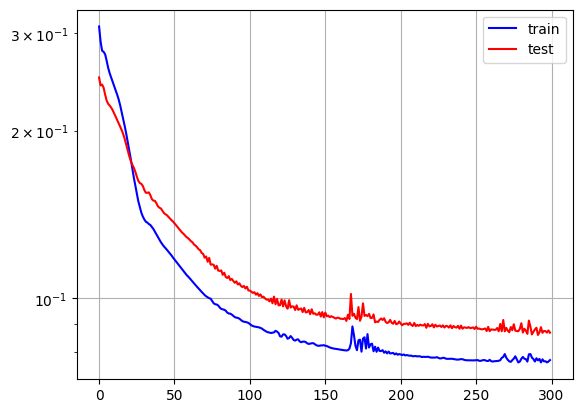

In [10]:
plt.plot(loss_history_train,color='blue')
plt.plot(loss_history_test,color='red')
plt.legend(['train','test'])
#log 
plt.yscale('log')
plt.grid()
plt.show()